In [100]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
orders = pd.read_csv("./data/Orders.csv")

In [81]:
type(orders.Profit[1])

str

In [82]:
orders.Profit = orders.Profit.str.replace("$","").str.replace(",","").apply(pd.to_numeric, errors = 'coerce')

In [83]:
orders.Sales = orders.Sales.str.replace("$","").str.replace(",","").apply(pd.to_numeric, errors = 'coerce')

In [93]:
orders.head(2)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Order.Year
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11,2014
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2,2014


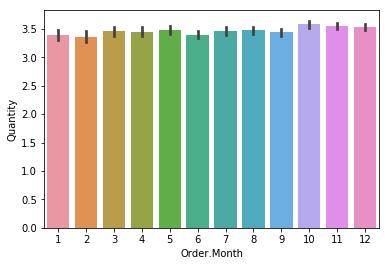

In [153]:
sns.barplot("Order.Month", "Quantity", data = orders)

In [86]:
orderdate = pd.to_datetime(orders['Order.Date'], format = "%m/%d/%y")

In [160]:
orders.head(1)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Order.Year
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11,2014


In [91]:
orders["Order.Month"] = [x.month for x in orderdate]
orders["Order.Year"] = [x.year for x in orderdate]

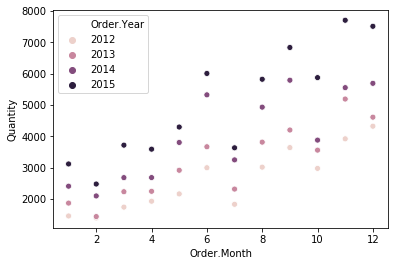

In [159]:
inventorytrend = orders.groupby(["Order.Year","Order.Month"]).agg('sum').reset_index()
# inventorytrend

sns.scatterplot("Order.Month", "Quantity", data = inventorytrend, hue="Order.Year")

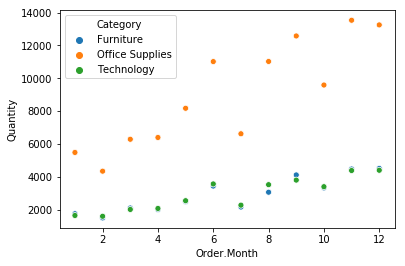

In [164]:
categorytrend = orders.groupby(["Category","Order.Month"]).agg("sum").reset_index()
sns.scatterplot("Order.Month", "Quantity", data = categorytrend, hue="Category")

In [166]:
categorytrend

,Category,Order.Month,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Year
0,Furniture,1,12689244,4614285.0,228829.15,1750,80.820,14224.86,23256.43500,988772
1,Furniture,2,11089801,4118202.0,190255.60,1494,66.590,18321.97,20880.32100,853833
2,Furniture,3,14019457,7287982.0,250388.41,2098,103.230,17863.18,25044.62100,1155938
3,Furniture,4,14335205,7453416.0,210529.31,2005,103.210,9864.11,23838.71400,1145848
4,Furniture,5,17935541,8357285.0,285390.71,2484,123.100,13908.17,32910.86800,1435851
5,Furniture,6,23258990,7475602.0,409439.17,3434,178.140,28287.67,42976.18800,2007701
6,Furniture,7,14802042,8981807.0,227072.62,2157,102.460,12505.84,25759.39200,1244552
7,Furniture,8,22900336,7159885.0,391224.77,3059,133.850,22556.78,42939.37700,1757999
8,Furniture,9,28669873,15079344.0,493576.73,4111,197.150,48380.57,49747.17400,2370237
9,Furniture,10,20518083,10574869.0,383938.11,3323,150.400,32886.80,42064.56700,1880881
